<a href="https://colab.research.google.com/github/guruprasadbotics/Hello-World/blob/master/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')
#%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go

#for checking & Plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading the **dataset**

In [89]:
df = pd.read_excel('/content/drive/My Drive/Analytics/stock_price_dataset.xlsx')

In [90]:
print(df)

           Date        Open        High         Low       Close   Adj Close  \
0    2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1    2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2    2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3    2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4    2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...         ...         ...         ...         ...         ...         ...   
1004 2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005 2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006 2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007 2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008 2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1     12595800  


In [91]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 55.3 KB


FInding the Date range and number of days of the Stock

In [93]:
print(f'Stock date range {df.Date.min()} {df.Date.max()}')
print(f'Total days = {(df.Date.max() - df.Date.min()).days}days')

Stock date range 2018-02-05 00:00:00 2022-02-04 00:00:00
Total days = 1460days


In [94]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


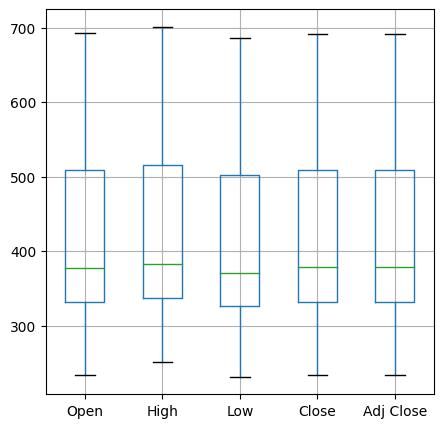

In [95]:
boxplot = df[['Open','High','Low','Close','Adj Close']].boxplot(figsize = (5,5))

Finding Outliers using box plot

<Axes: >

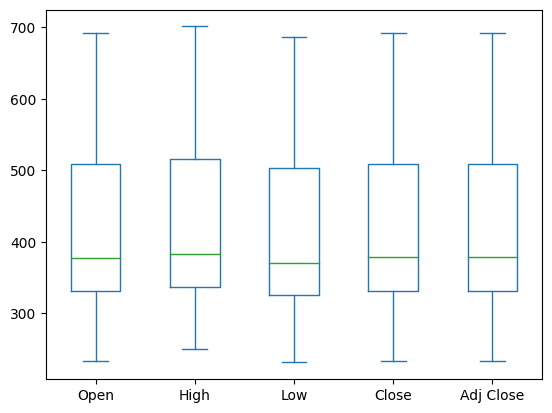

In [96]:
df[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [97]:
df.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1004,False,False,False,False,False,False,False
1005,False,False,False,False,False,False,False
1006,False,False,False,False,False,False,False
1007,False,False,False,False,False,False,False


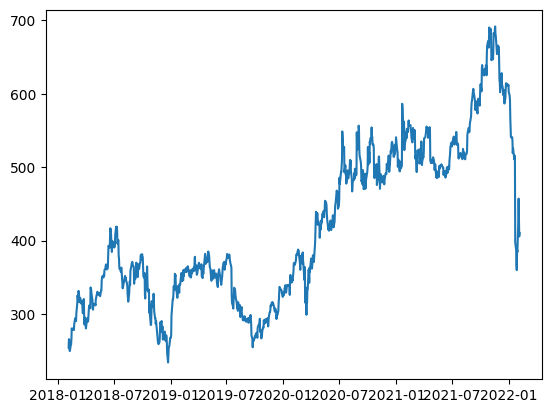

In [98]:
plt.plot(df['Date'], df['Adj Close'])

In [99]:
#Regression model imports
from sklearn.model_selection import train_test_split

#Precprocessing Imports
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For testing accuracy
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [100]:
# Splitting the data into train and test sets
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=101)

In [101]:
scaler = StandardScaler().fit(X_train)

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [104]:
# Plot actual and predicted values for train dataset
layout = go.Layout(
    title = 'Stock prices',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = 'markers',
    name = 'Actual'
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'predicted'
)
stock_data = [trace0, trace1]
layout.xaxis.title.text = 'Day'
plot2 = go.Figure(data=stock_data, layout=layout)


In [105]:
iplot(plot2)

In [108]:
# Calculating scores for model evaluation
scores = f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.6992669032944175	0.7261648669848495
MSE       3403.003880002517	3460.9885809580633

